<a href="https://colab.research.google.com/github/ArturJordaoo/big_data/blob/main/bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install basedosdados
import pandas as pd
import basedosdados as bd

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='br_ibge_inpc',
table_id='mes_brasil',
billing_project_id="smart-pride-334217")

Downloading: 100%|██████████| 531/531 [00:00<00:00, 1508.11rows/s]


In [ ]:
# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='br_ibge_inpc',
table_id='mes_categoria_brasil',
billing_project_id="smart-pride-334217")

Downloading: 100%|██████████| 18327/18327 [00:02<00:00, 6965.81rows/s]


# Renomeação de colunas

In [ ]:
df = pd.read_csv('dados_filtrados.csv')


In [ ]:
# Renomeia as colunas para ficar mais legível
df = df.rename(columns={'inpc': 'indice_inpc',
                        'ipcA': 'indice_ipca'})

In [ ]:
#Aplicando regressão linear
X = df[['ano', 'mes', 'id_categoria', 'peso_mensal', 'variacao_mensal', 'variacao_anual']]
y = df['data']

In [ ]:
# Obtenha todas as categorias únicas
categorias_unicas = df['categoria'].unique()

# Imprima as categorias únicas
for categoria in categorias_unicas:
    print(categoria)

In [ ]:
# Crie uma lista com as categorias desejadas
categorias_desejadas = ['Alimentação e bebidas', 'Habitação', 'Artigos de residência', 'Vestuário', 'Transportes', 'Saúde e cuidados pessoais', 'Despesas pessoais', 'Educação', 'Comunicação']

# Filtrar o DataFrame com base nas categorias desejadas
df_filtrado = df.loc[df['categoria'].isin(categorias_desejadas)]

# Salvar o DataFrame filtrado no arquivo CSV
df_filtrado.to_csv('/content/dados_filtrados.csv', index=False)


In [ ]:
from sklearn.linear_model import LinearRegression

# Loop através das categorias desejadas
for categoria in categorias_desejadas:
    # Filtrar o DataFrame para a categoria atual
    df_categoria = df_filtrado[df_filtrado['categoria'] == categoria]

    # Dividir o DataFrame em recursos (X) e variável alvo (y)
    X = df_categoria[['ano', 'mes']].values
    y = df_categoria['peso_mensal'].values

    # Instanciar o modelo de regressão linear
    model = LinearRegression()

    # Treinar o modelo
    model.fit(X, y)

    # Prever o peso mensal para janeiro de 2024
    previsao_2024 = model.predict([[2024, 1]])

    # Imprimir a previsão para a categoria atual
    print(f'Categoria: {categoria}')
    print(f'Previsão para janeiro de 2024: {previsao_2024}\n')


In [ ]:
import pandas as pd

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv('dados_filtrados.csv')

# Filtrar as linhas com base nos IDs desejados
df = df.loc[(df['categoria'] != 'Comunicação') | (df['id_categoria'] == 9.0)]
df = df.loc[(df['categoria'] != 'Transportes') | (df['id_categoria'] == 5.0)]

# Salvar as alterações no arquivo CSV
df.to_csv('dados_filtrados.csv', index=False)


In [ ]:
df_categoria['peso_mensal'] = df_categoria['peso_mensal'].round(2).astype(float)

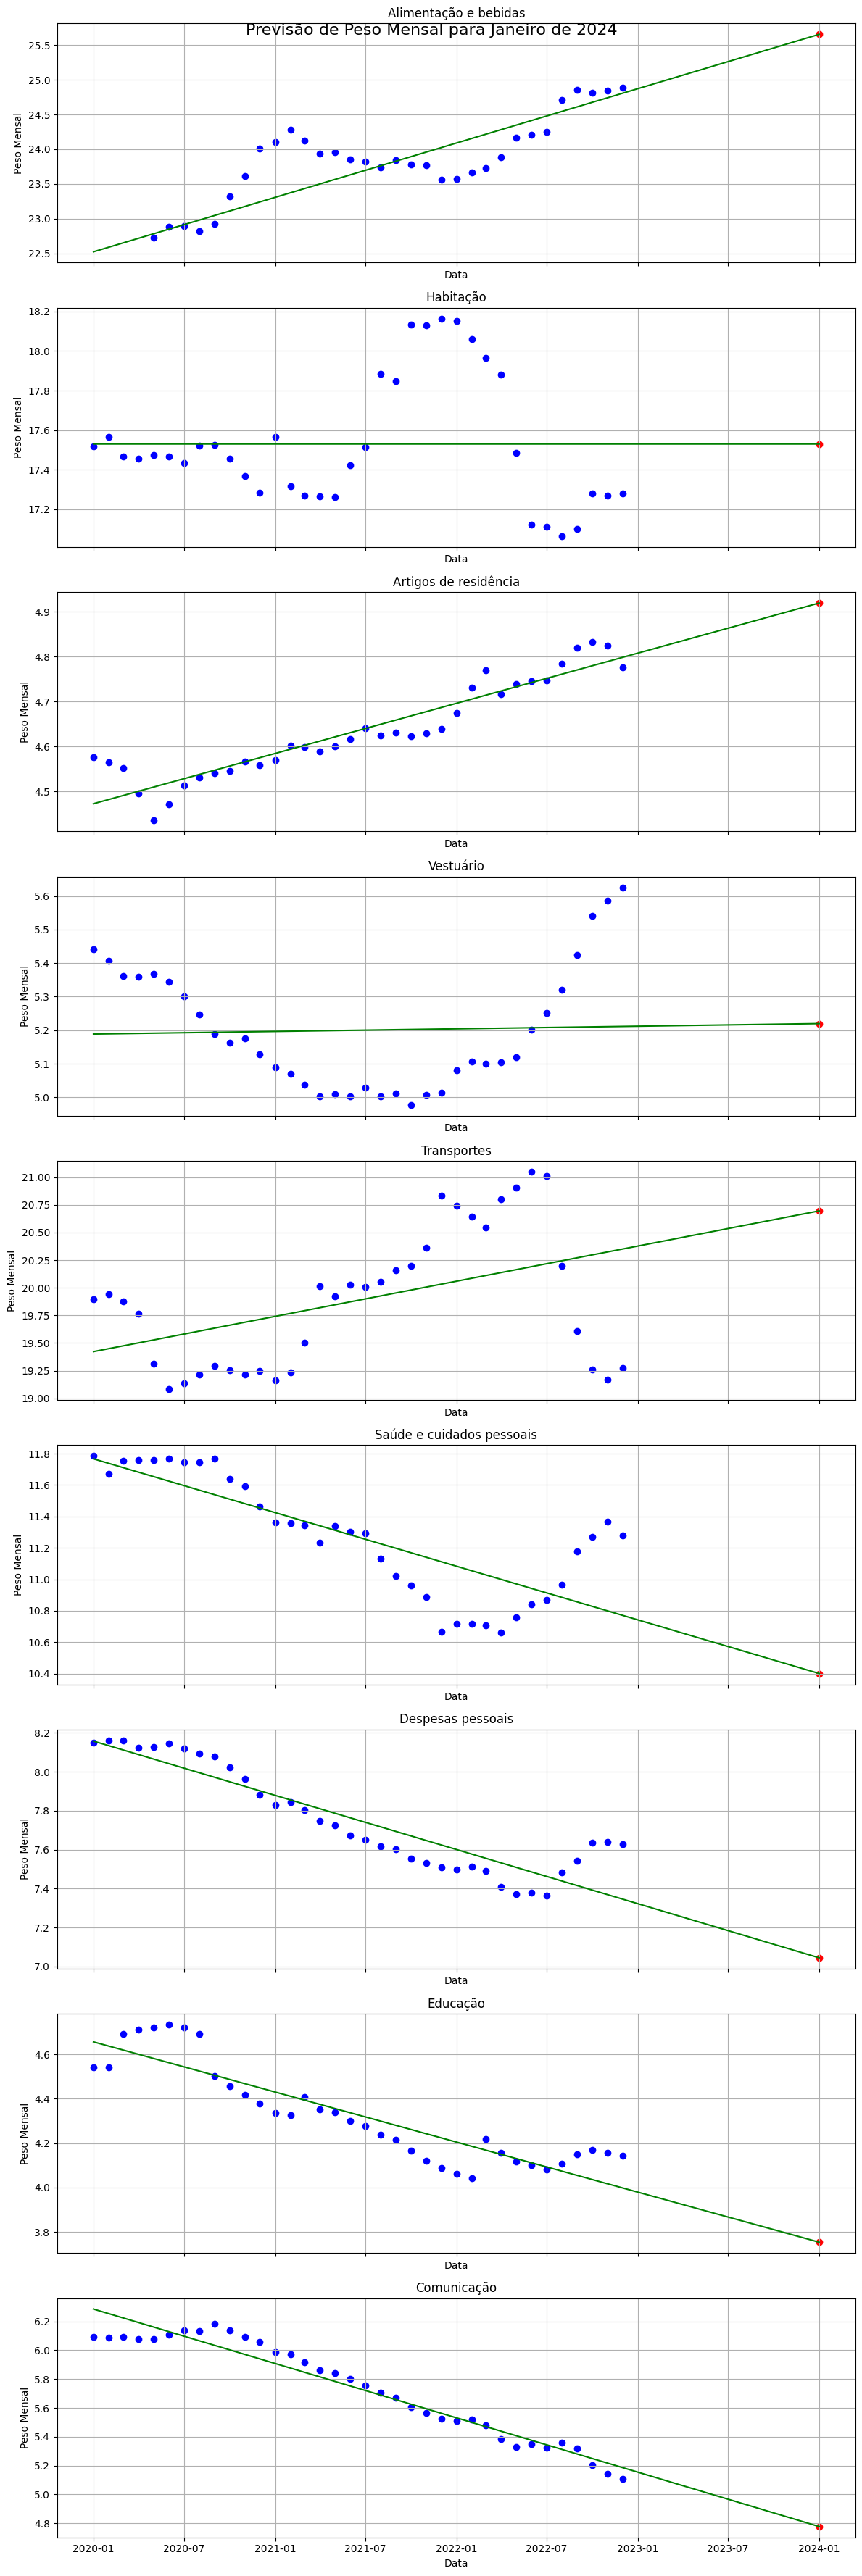

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Converter a coluna 'mes' para valores numéricos
df_filtrado['mes'] = df_filtrado['mes'].astype(int)

# Obter a lista de IDs de categoria únicos
id_categorias = df_filtrado['id_categoria'].unique()

# Configurar o tamanho do gráfico
fig, axes = plt.subplots(len(id_categorias), 1, figsize=(12, 4 * len(id_categorias)), sharex=True)

# Iterar sobre os IDs de categoria
for i, id_categoria in enumerate(id_categorias):
    # Filtrar o DataFrame para o ID de categoria atual
    df_categoria = df_filtrado[df_filtrado['id_categoria'] == id_categoria]

    # Obter o nome da categoria atual
    nome_categoria = df_categoria['categoria'].iloc[0]

    # Ordenar o DataFrame pela coluna 'data' e 'mes'
    df_categoria = df_categoria.sort_values(['data', 'mes'])

    # Converter as datas para objetos datetime
    dates = pd.to_datetime(df_categoria['data'])

    # Converter as datas para números equivalentes
    df_categoria['data_num'] = mdates.date2num(dates)

    # Dividir o DataFrame em recursos (X) e variável alvo (y)
    X = df_categoria['data_num'].values.reshape(-1, 1)
    y = df_categoria['peso_mensal'].values

    # Instanciar o modelo de regressão linear
    model = LinearRegression()

    # Treinar o modelo
    model.fit(X, y)

    # Gerar valores de X para fazer a previsão
    X_pred = mdates.date2num(pd.to_datetime(['2024-01-01'])).reshape(-1, 1)

    # Prever o peso mensal para maio de 2024
    y_pred = model.predict(X_pred)

    # Plotar os pontos reais no conjunto de eixos correspondente
    axes[i].scatter(dates, df_categoria['peso_mensal'], label=f'Valores reais ({nome_categoria})', color='blue')

    # Plotar a previsão como um ponto no conjunto de eixos correspondente
    axes[i].scatter(mdates.num2date(X_pred[:, 0]), y_pred, color='red', label=f'Previsão 2024-01 ({nome_categoria}: {y_pred[0]:.2f})')

    # Plotar a linha de regressão no conjunto de eixos correspondente
    X_line = np.concatenate([X, X_pred])
    y_line = np.concatenate([model.predict(X), y_pred])
    axes[i].plot(mdates.num2date(X_line[:, 0]), y_line, label=f'Regressão linear ({nome_categoria})', color='green')

    # Configurar o título e os rótulos dos eixos para o conjunto de eixos correspondente
    axes[i].set_title(f'{nome_categoria}')
    axes[i].set_ylabel('Peso Mensal')
    axes[i].set_xlabel('Data')
    axes[i].set_xticklabels(dates.dt.strftime('%Y-%m'))
    axes[i].grid(True)

    # Definir o formato de data para o eixo x
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # Ajustar o espaçamento vertical entre os subgráficos
    plt.subplots_adjust(hspace=0.5)

# Configurar o título e os rótulos dos eixos compartilhados
plt.suptitle('Previsão de Peso Mensal para Janeiro de 2024', fontsize=16)
plt.xlabel('Data')

# Ajustar os espaçamentos e mostrar o gráfico
plt.tight_layout()
plt.show()


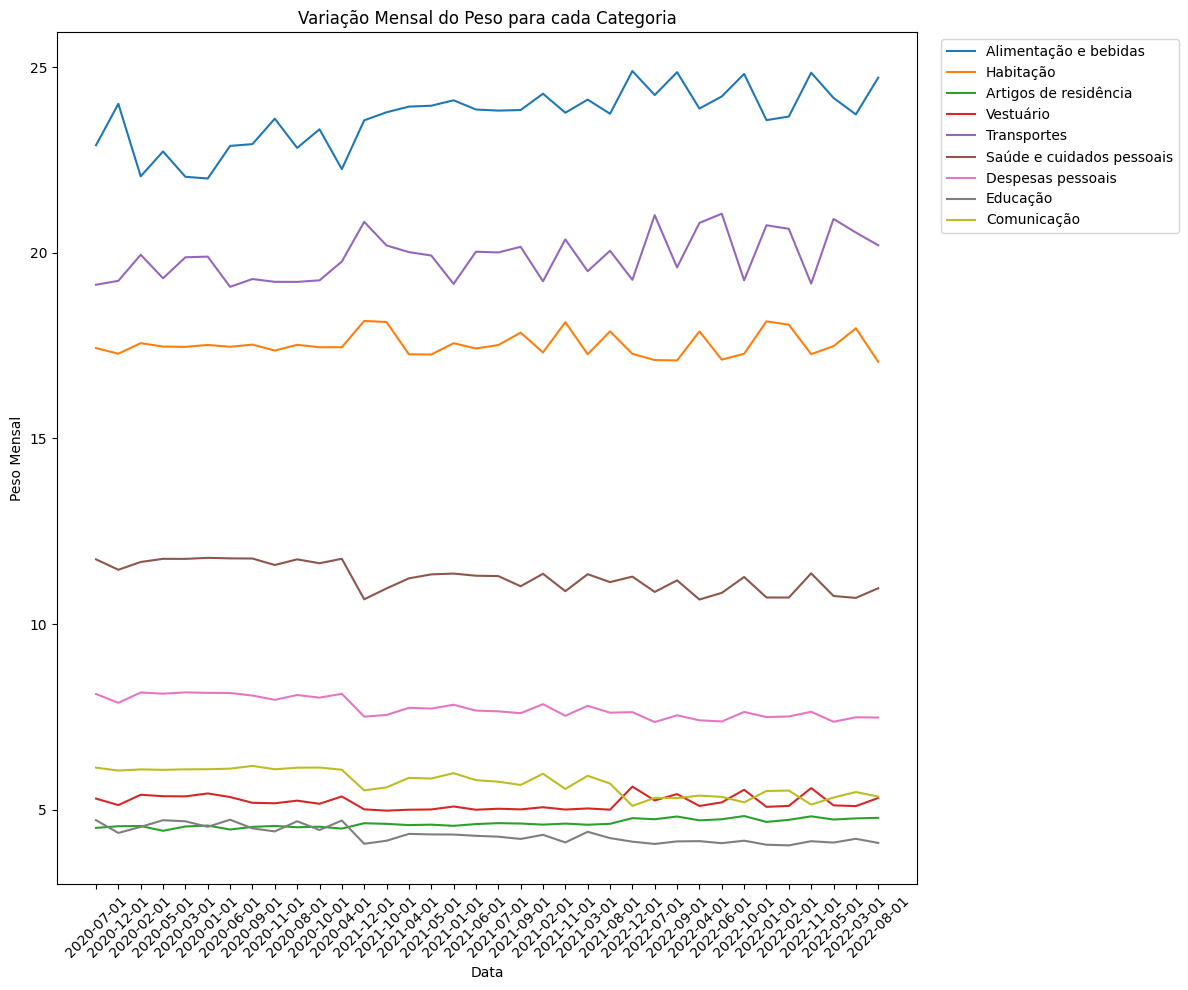

In [ ]:
import seaborn as sns

# Configurar o tamanho do gráfico
plt.figure(figsize=(12, 10))

# Plotar o gráfico de variação mensal do peso para cada categoria
sns.lineplot(data=df_filtrado, x='data', y='peso_mensal', hue='categoria')

# Configurar o título e os rótulos dos eixos
plt.title('Variação Mensal do Peso para cada Categoria')
plt.xlabel('Data')
plt.ylabel('Peso Mensal')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Posicionar a legenda fora do gráfico
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Exibir o gráfico
plt.tight_layout()
plt.show()



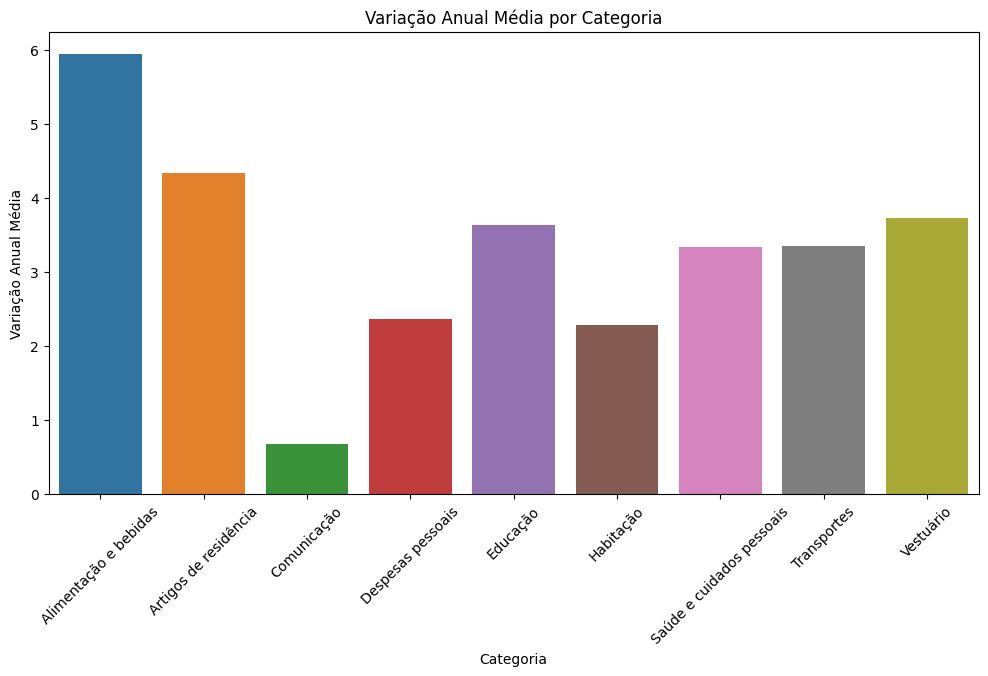

In [ ]:
# Calcular a variação anual média por categoria
df_variacao_anual_media = df_filtrado.groupby('categoria')['variacao_anual'].mean().reset_index()

# Configurar o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Plotar o gráfico de variação anual média por categoria
sns.barplot(data=df_variacao_anual_media, x='categoria', y='variacao_anual')

# Configurar o título e os rótulos dos eixos
plt.title('Variação Anual Média por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Variação Anual Média')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

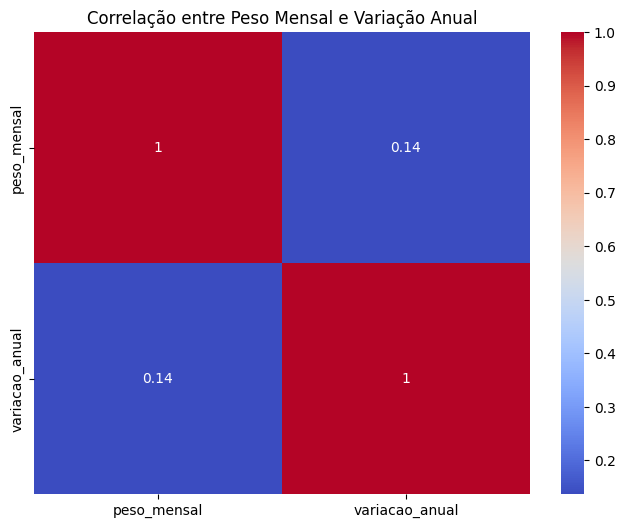

In [ ]:
# Calcular a matriz de correlação entre peso mensal e variação anual
correlation_matrix = df_filtrado[['peso_mensal', 'variacao_anual']].corr()

# Configurar o tamanho do gráfico
plt.figure(figsize=(8, 6))

# Plotar o mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Configurar o título
plt.title('Correlação entre Peso Mensal e Variação Anual')

# Exibir o gráfico
plt.show()